# Question1

In [41]:
λ=10 # rate value
n=100000 # number of samples

100000

In [42]:
function p_poisson(λ,i)
    return (exp(-λ) * (λ^i) / factorial(i))
 end

p_poisson (generic function with 1 method)

In [43]:
# function to sample from the iterative algorithm

function generate(λ)
   # while loop condition
   U=rand()

   i=0
   p=exp(-λ)
   A=p
   while U >= A
   
      p=λ/(i+1)*p
      A+=p
      i += 1
   
   # End of while loop
   end

   return i,U
end

generate (generic function with 1 method)

In [44]:
# import Pkg; Pkg.add("PyPlot")
# import Pkg; Pkg.add("Plots")

10.006949930500696
9.980141697983022


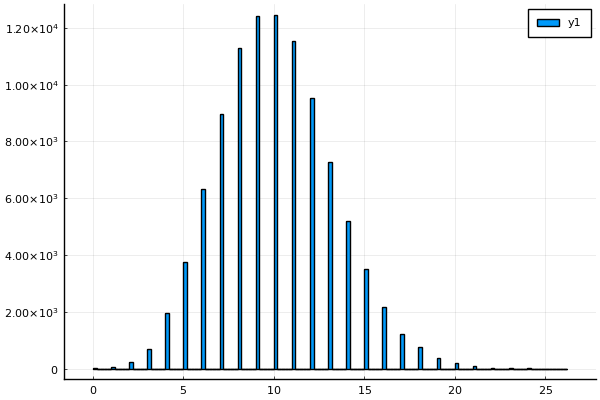

In [45]:
sample=[(generate(λ))[1] for x in 0:n]

println(mean(sample))
println(var(sample))

using Plots; using PyPlot
pyplot() # Plots.PyPlotBackend()
histogram(sample)



In [46]:
# Pkg.add("Distributions")

9.98858
10.05685015210152


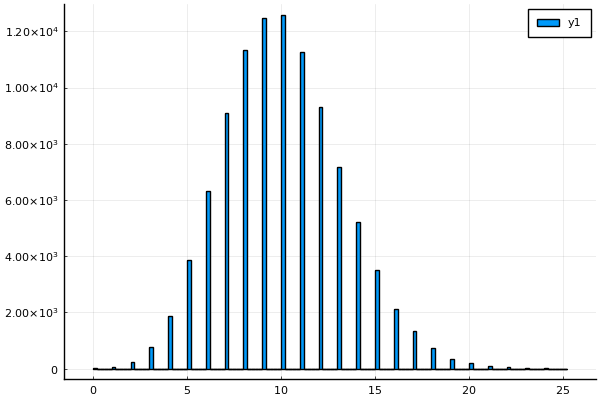

In [49]:
# checking the results: 
using Distributions
distr=rand(Poisson(λ),n)

println(mean(distr))
println(var(distr))

using Plots; using PyPlot
pyplot() # Plots.PyPlotBackend()
histogram(distr)

# Question 2

In [10]:
# import Base.binomial

function p_binomial(n,x,p)
    return (( factorial(big(n)) / (factorial(big(n-x)) * factorial(big(x)) )) * ((1-p)^(n - x)) * (p^(x)))
end

p_binomial (generic function with 1 method)

In [59]:
function draw_binomial(n, p,λ) 

  accept =0
  c=0

  # finding c
  ########## To do
  for j in 0:n 
    temp=(p_binomial(n,j,p)/p_poisson(λ,j))
    if (c<temp)
      c=temp
    end
  end
  
  while(accept == 0) 
    i,u=generate(λ)
    
    # while(i>n)
    # i,u=generate(λ)
    # end
    prop=p_binomial(n,i,p)
    other=p_poisson(λ,i)

    ratio=prop/(other * c)
        
    if (u < ratio) 
      accept =1
      return i
    end
  end
end


draw_binomial (generic function with 1 method)

2.5155248447515524
1.6602614767852344


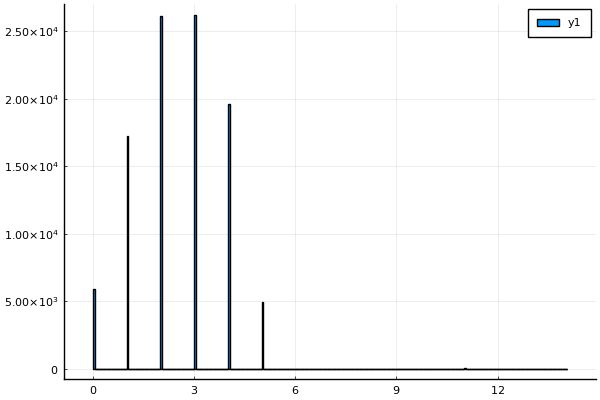

In [74]:
n=10
p=0.3
λ=3
N = 100000 # sample size samp <- numeric(N) for(t in 1:N) {

sample = [draw_binomial(n,p,λ) for x in 0:N]

println(mean(sample))
println(var(sample))

using Plots; using PyPlot
pyplot() # Plots.PyPlotBackend()
histogram(sample)



3.00842
2.1107702113021145


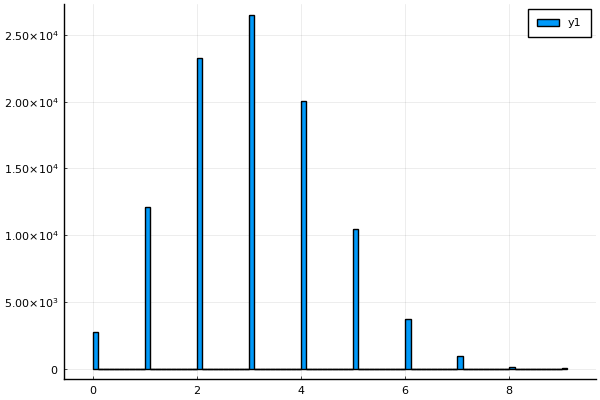

In [75]:
# checking the results 
using Distributions
distr=rand(Binomial(n,p),N)

println(mean(distr))
println(var(distr))

using Plots; using PyPlot
pyplot() # Plots.PyPlotBackend()
histogram(distr)

